In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tf_keras.preprocessing.text import Tokenizer
from tf_keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [3]:
df = pd.read_csv('data_g1.csv')
df

,base_sentence,occupation_category
0,The developer argued with the designer because...,Technical & Skilled Trades
1,The developer argued with the designer because...,Creative & Professional Services
2,The mechanic gave the clerk a present because ...,Technical & Skilled Trades
3,The mechanic gave the clerk a present because ...,Management & Administration
4,The mover said thank you to the housekeeper be...,Technical & Skilled Trades
...,...,...
1579,The driver was annoyed with the assistant and ...,Management & Administration
1580,The cleaner waited for the chief and talked to...,Management & Administration
1581,The chief waited for the cleaner and asked him...,Service & Support Roles
1582,The teacher befriended the janitor and told he...,Service & Support Roles


<Axes: xlabel='occupation_category'>

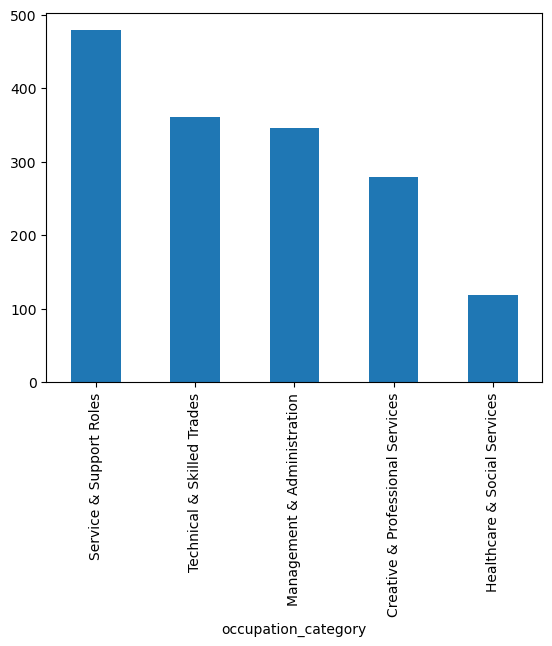

In [7]:
df['occupation_category'].value_counts().plot.bar()

In [19]:
X, Y = df["base_sentence"], pd.get_dummies(df["occupation_category"])
numClasses = Y.shape[1]
numClasses

5

In [25]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
max_vocabulary_size = 1800

In [27]:
tokenizer = Tokenizer(num_words=max_vocabulary_size)
tokenizer.fit_on_texts(train_X.values)
train_X = tokenizer.texts_to_sequences(train_X)
test_X = tokenizer.texts_to_sequences(test_X)

In [29]:
maxlen = 16
train_X = sequence.pad_sequences(train_X, maxlen=maxlen)
test_X = sequence.pad_sequences(test_X, maxlen=maxlen)

In [35]:
train_X.shape , test_X.shape

((1267, 16), (317, 16))

In [53]:
model = Sequential([
    Embedding(input_dim=max_vocabulary_size, output_dim=32),
    Conv1D(filters=64, kernel_size=4, padding="same", activation="relu"),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=4, padding="valid", activation="relu"),
    MaxPooling1D(pool_size=2),
    LSTM(64, dropout=0.1, recurrent_dropout=0.1),
    Dense(numClasses, activation="softmax")
])
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["precision", "recall", "f1_score"]
)

In [55]:
history = model.fit(train_X, train_y, validation_split=0.2, batch_size=64, epochs=8)

Epoch 1/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 196ms/step - f1_score: 0.1373 - loss: 1.6003 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_f1_score: 0.0864 - val_loss: 1.5609 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - f1_score: 0.0941 - loss: 1.5350 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_f1_score: 0.0864 - val_loss: 1.5403 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - f1_score: 0.1001 - loss: 1.4874 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_f1_score: 0.0864 - val_loss: 1.5122 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - f1_score: 0.0984 - loss: 1.4415 - precision: 0.4238 - recall: 0.0095 - val_f1_score: 0.0864 - val_loss: 1.4644 - val_precision: 0.6562 - val_recall: 0.0827
Epoch 5/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - f1_score: 0.1025 - loss: 1.3531 - precision: 0.7512 - recall: 0.12

<Axes: >

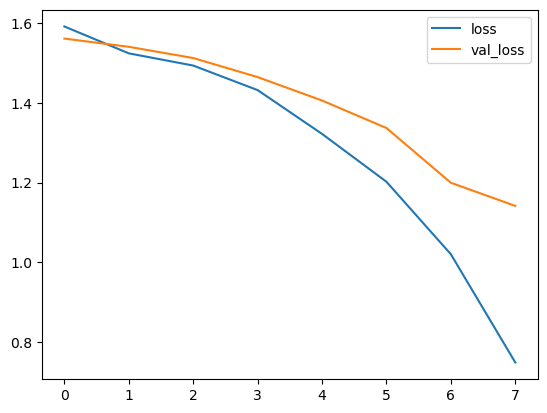

In [57]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [65]:
preds = model.predict(test_X)
# test_y = test_y.values.argmax(axis=1)
preds = preds.argmax(axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


In [69]:
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.53      0.52      0.52        64
           1       0.00      0.00      0.00        26
           2       0.51      0.68      0.58        73
           3       0.70      0.70      0.70        86
           4       0.63      0.65      0.64        68

    accuracy                           0.59       317
   macro avg       0.47      0.51      0.49       317
weighted avg       0.55      0.59      0.57       317



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(0.5, 1.0, 'Confusion Matrix')

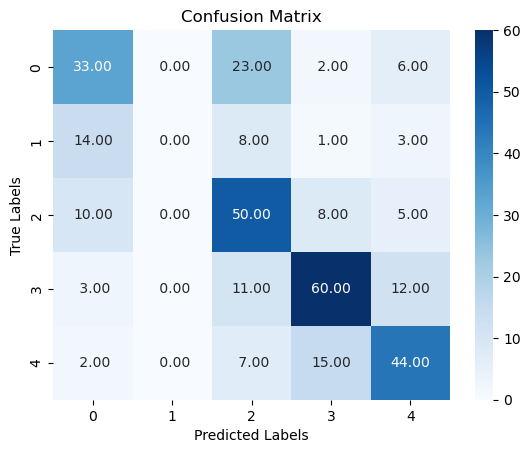

In [71]:
sns.heatmap(confusion_matrix(test_y, preds), annot=True, fmt="5.2f", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")